# Exective summary of Work Package 2

## Objectives

In this WP, you will work on a given training dataset. Your goal is to develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Tasks

- Task 1: Develop a fault detection model using the unsupervised learning algorithms learnt in the class, in order to achieve best F1 score.
- Task 2: With the help of the supporting script, develop a cross-validation scheme to test the performance of the developed classification algorithms.
- Task 3: Develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_2_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1: Unsupervised learning approaches

## Implement the statistical testing approach for fault detection

In this exercise, we interpret the statistical testing approach for fault detection. The basic idea of statistical testing approach is that we fit a multi-dimensitional distribution to the observation data under normal working condition. Then, when a new data point arrives, we design a hypothesis test to see whether the new data point is consistent with the distribution. If the new data point is consistent with the distribution, we can conclude that the fault is not due to the faulty component.

The benefit of this approach is that, to design the detection algrothim, we do not need failed data. Also, the computational time is short as all we need is just to compute the pdf and compare it to a threshold.

In this exercise, you need to:
- Fit a multi-dimensitional distribution to the training dataset (all normal samples).
- Design a fault detection algorithm based on the fitted distribution to detect faulty components.

The following block defines a few functions that you can use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal


def estimateGaussian(X):
    '''Given X, this function estimates the parameter of a multivariate Gaussian distribution.'''
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2


def classify(X, distribution, log_epsilon=-50):
    '''Given X, this function classifies each sample in X based on the multivariate Gaussian distribution. 
       The decision rule is: if the log pdf is less than log_epsilon, we predict 1, as the sample is unlikely to be from the distribution, which represents normal operation.
    '''
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    
    return predictions

Let us use the dataset `20240105_164214` as training dataset, as all the samples in this dataset are normal operation. We will use the dataset `20240325_155003` as testing dataset. Let us try to predict the state of motor 1. For this, we first extract the position, temperature and voltage of motor 1 as features (you can change the features if you want). 

In [2]:
import sys
sys.path.insert(0, 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

# We do the same to get the test dataset.
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

Please design your algorithm below:

In [3]:
from sklearn.metrics import accuracy_score
# First, we need to fit a MVN distribution to the normal samples.
mu,sigma2=estimateGaussian(X_train)
# Construct a multivariate Gaussian distribution to represent normal operation.
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Now, let's try to predict the labels of the test set X_test.
y_pred=classify(X_test, distribution, log_epsilon=-50)
# Calculate accuracy of the prediction.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19422730006013228


**Discussions:**
- Can you please try to improve the performance of this approach?
    - For example, by normalizating the data?
    - By smoothing the data?
    - By reducing feature number?
    - etc.
- The parameter log_epsilon defines the threshold we use for making classification. What happens if you change it?
- Could you discuss how we should get the best value for this parameter?

We keep only the features ('data_motor_1_temperature', 'data_motor_1_voltage')

In [4]:
X_train2=X_train[[ 'data_motor_1_temperature', 'data_motor_1_voltage']]
X_test2=X_test[[ 'data_motor_1_temperature', 'data_motor_1_voltage']]
mu2,sigma22=estimateGaussian(X_train2)
distribution2 = multivariate_normal(mean=mu2, cov=np.diag(sigma22))
y_pred2=classify(X_test2, distribution2, log_epsilon=-50)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy 2 :", accuracy2)

Accuracy 2 : 0.45384846662657846


As we saw in TP1, the most relevant feature is 'data_motor_1_temperature' so we keep only that feature

In [5]:
X_train3=X_train[[ 'data_motor_1_temperature']]
X_test3=X_test[[ 'data_motor_1_temperature']]
mu3,sigma23=estimateGaussian(X_train3)
distribution3 = multivariate_normal(mean=mu3, cov=np.diag(sigma23))
y_pred3=classify(X_test3, distribution3, log_epsilon=-50)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy 3 :", accuracy3)

Accuracy 3 : 0.805622369212267


The accuracy is much more improved 

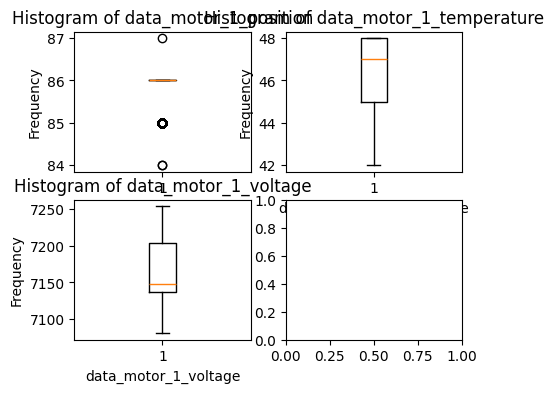

In [6]:
num_cols = len(X_train.columns)+1 // 2
num_rows = (num_cols + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(5, num_rows * 2))


axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    ax = axes[i]
    ax.boxplot(X_train[column])  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


we will try to normalize the data now and see what happens

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
X_train_norm = scaler2.fit_transform(X_train3)
X_test_norm = scaler2.fit_transform(X_test3)
mu3_n,sigma23_n=estimateGaussian(X_train_norm)
distribution3_n = multivariate_normal(mean=mu3_n, cov=np.diag(sigma23_n))
y_pred3_n=classify(X_test_norm, distribution3_n, log_epsilon=-50)
accuracy3_n = accuracy_score(y_test, y_pred3_n)
print("Accuracy 3 of normalized data :", accuracy3_n)


Accuracy 3 of normalized data : 0.8057726999398677


The result doesn't change much

Let's focus on the log_epsilon and watch the accuracy for different lo_epsilon values with the 3rd training set for which we had the best accuracy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


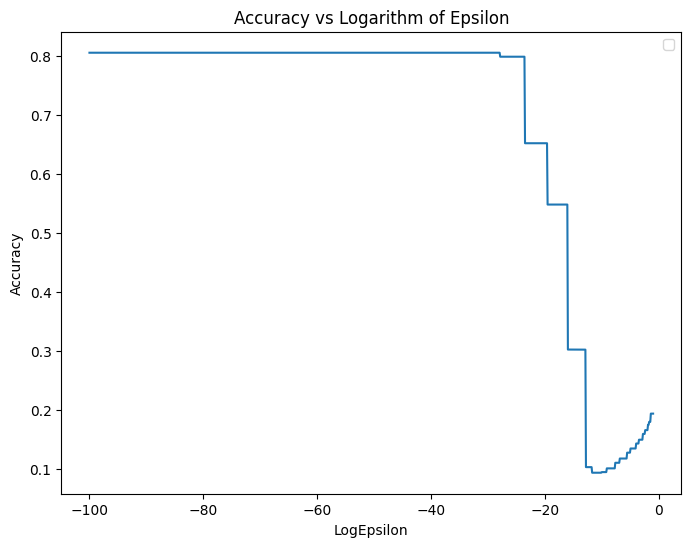

In [8]:
t_log=np.linspace(-1,-100,1000)
t_pred=[classify(X_test3, distribution3, log_epsilon=a) for a in t_log]
t_accuracy=[accuracy_score(y_test, pred) for pred in t_pred]
plt.figure(figsize=(8, 6))
plt.plot(t_log, t_accuracy)
#plt.plot(t_log, t_accuracy,'-o', 'b.', label='Accuracy vs Log_epsilon')
plt.xlabel('LogEpsilon')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Logarithm of Epsilon')
plt.legend()
plt.show()

The accuracy stays unchanged starting from the threshold log_epsilon=-30

## Local outiler factor (LOF)

The local outlier factor (LOF) algorithm computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. You can easiliy implement LOF in scikit-learn ([tutorial](https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html)).

Please implement local outlier factor (LOF) algorithm on the dataset of `20240325_155003`. You can try first to detect the failure of motor 1 using this model. Please calculate the accuracy score of your prediction.

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random


lof = LocalOutlierFactor(n_neighbors=10)

dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_temperature']]

#'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage'

y_pred = lof.fit_predict(X_train)

lofs_index = where(y_pred==-1)
values = X_train.iloc[lofs_index]
y_test = df_data['data_motor_1_label']

accuracy = accuracy_score(y_test, y_pred)
print("accuracy score for LOF = ",accuracy)

accuracy score for LOF =  0.19422730006013228


# Task 2 Develop a cross validation pipeline to evaluate the performance of the model.

The idea of cross validation is to split the data into k subsets and use one of them as the test set and the rest as the training set. The performance of the model is evaluated only on the test dataset, while the model is trained on the training dataset. By doing this, we ensure that the evaluation of the model is independent from the training of the model. Therefore, we can detect if the model is overfitted.

## k-fold cross validation

Here, we use motor 1 as an example to develop a pipeline for cross validation. Below, you have a script that read the data, extract features and get the labels.

1. Use sk-learn to split the data into training and testing sets, using a k-fold cross validation with k=5. (Hint: This is a routine task which can be answered easily by language models like chatgpt. You can try prompt like this: `Generate a code in python to split the data X and y into training and testing sets, using a k-fold cross validation with k=5.`)
2. Then, train a basic logistic regression model, without hyper-parameter tuning on the training set, and use the testing set to evaluate the performance of the model (calculate accuracy, precision, recall, and F1 score). 
3. Finally, train a logistic regression model, but use the entire dataset X and y as training data. Then, use the trained model to predict the labels of the same dataset (X). Compare the results with the previous step, and discuss why we should use cross validation to evaluate the performance of the model.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



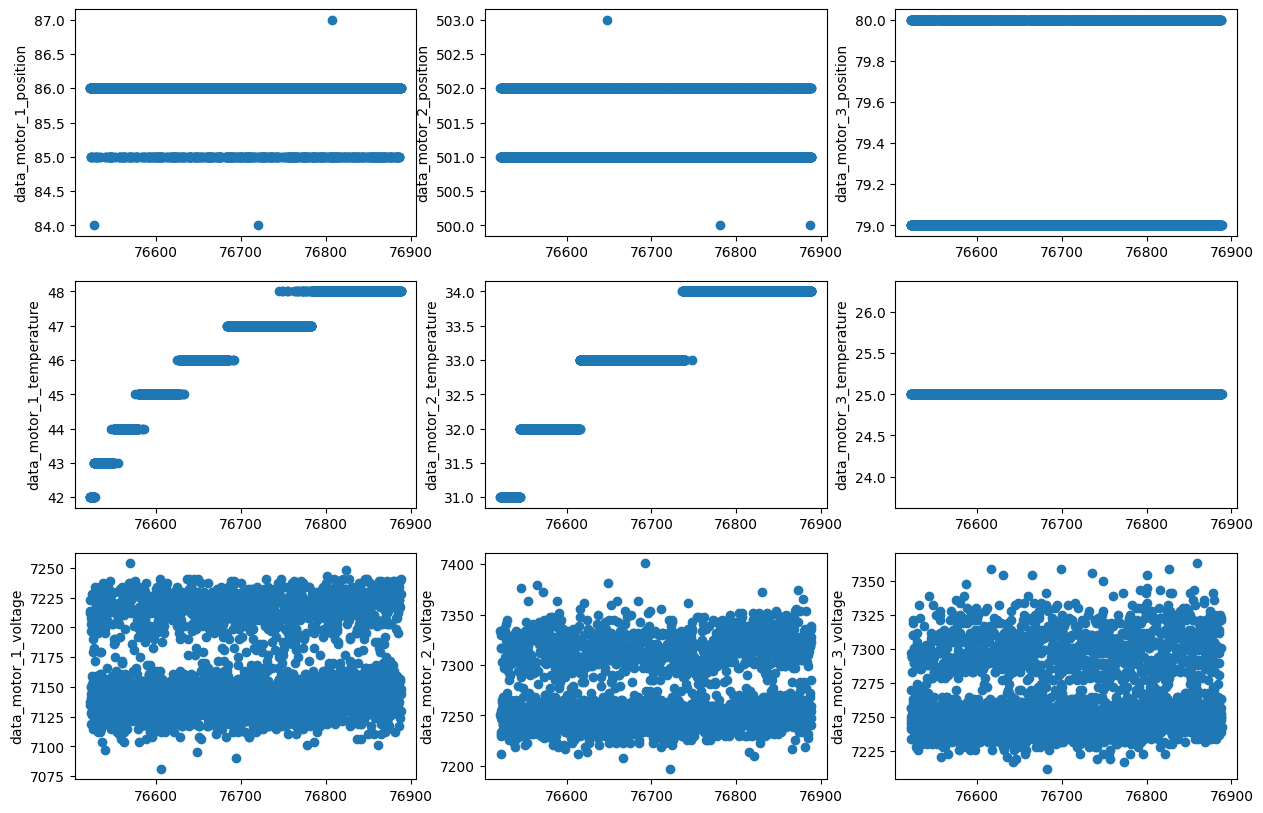

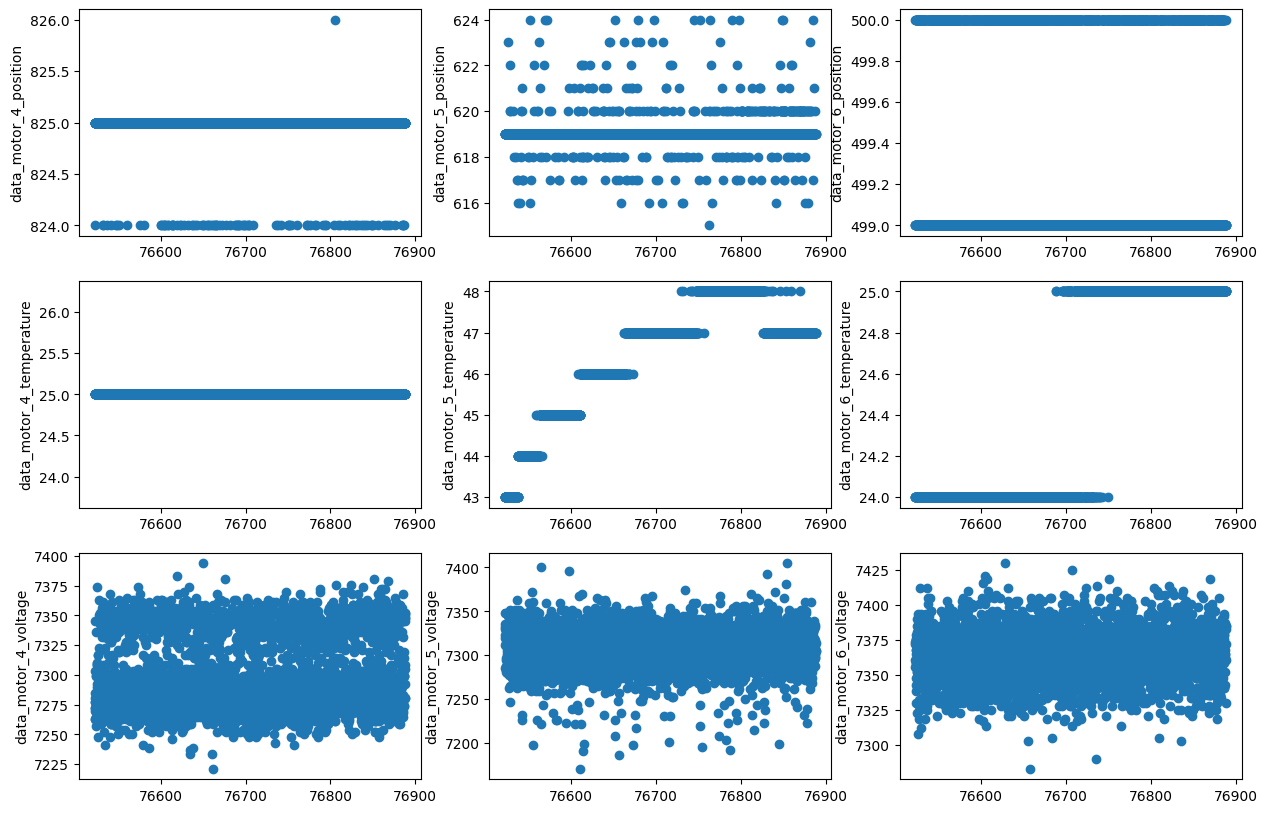

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



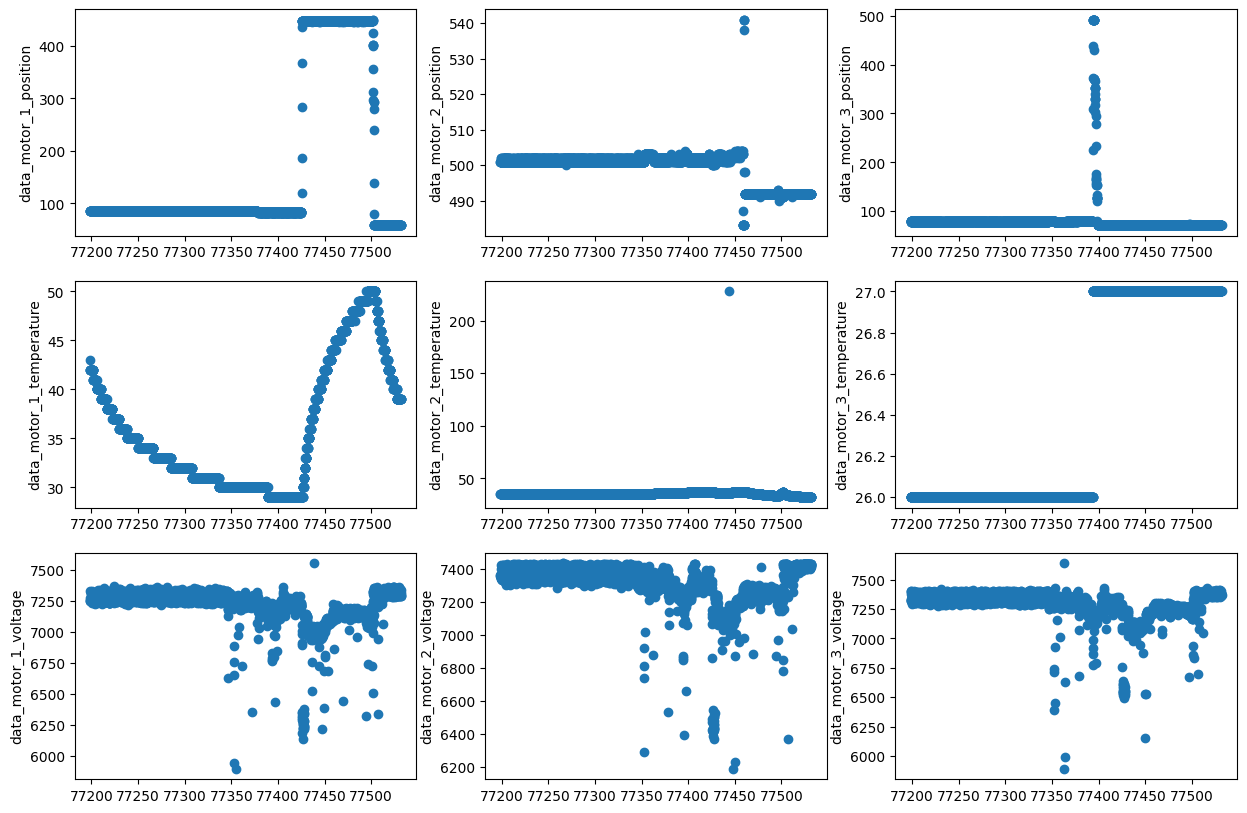

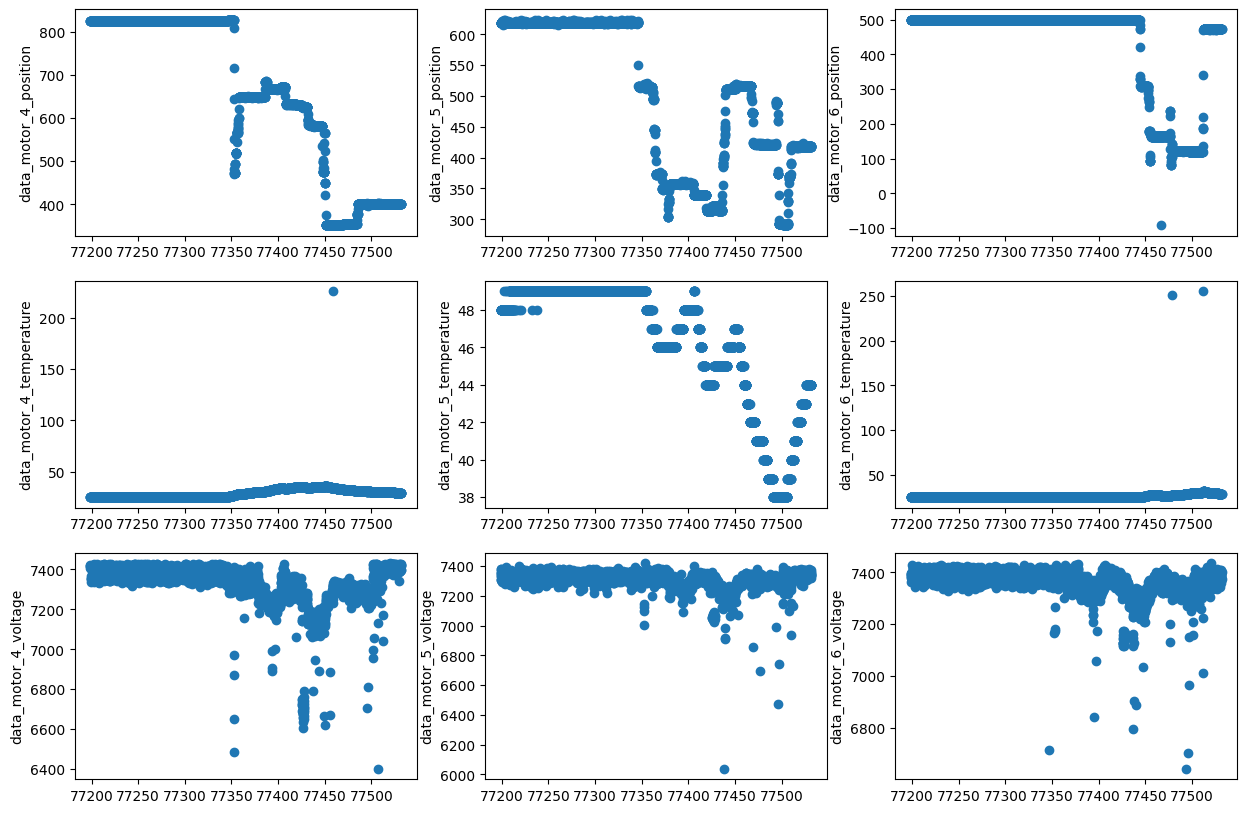

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



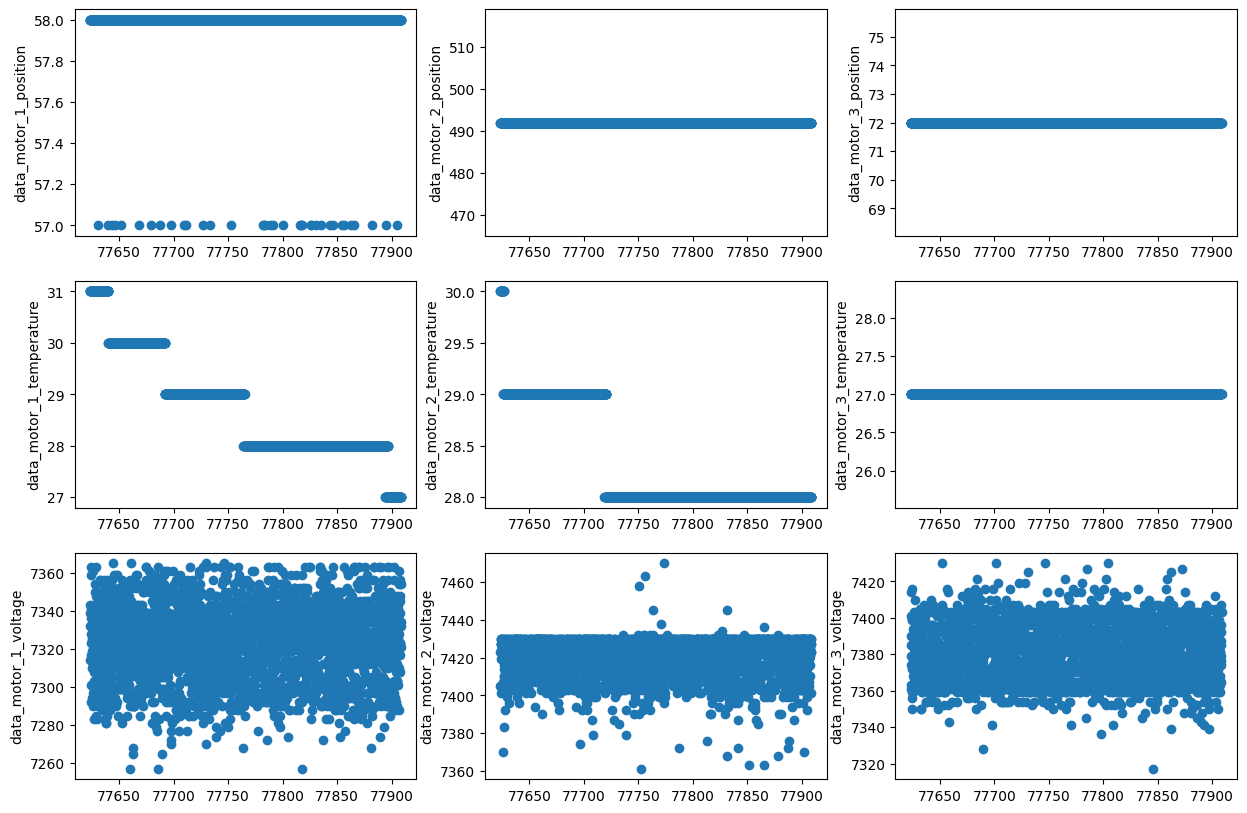

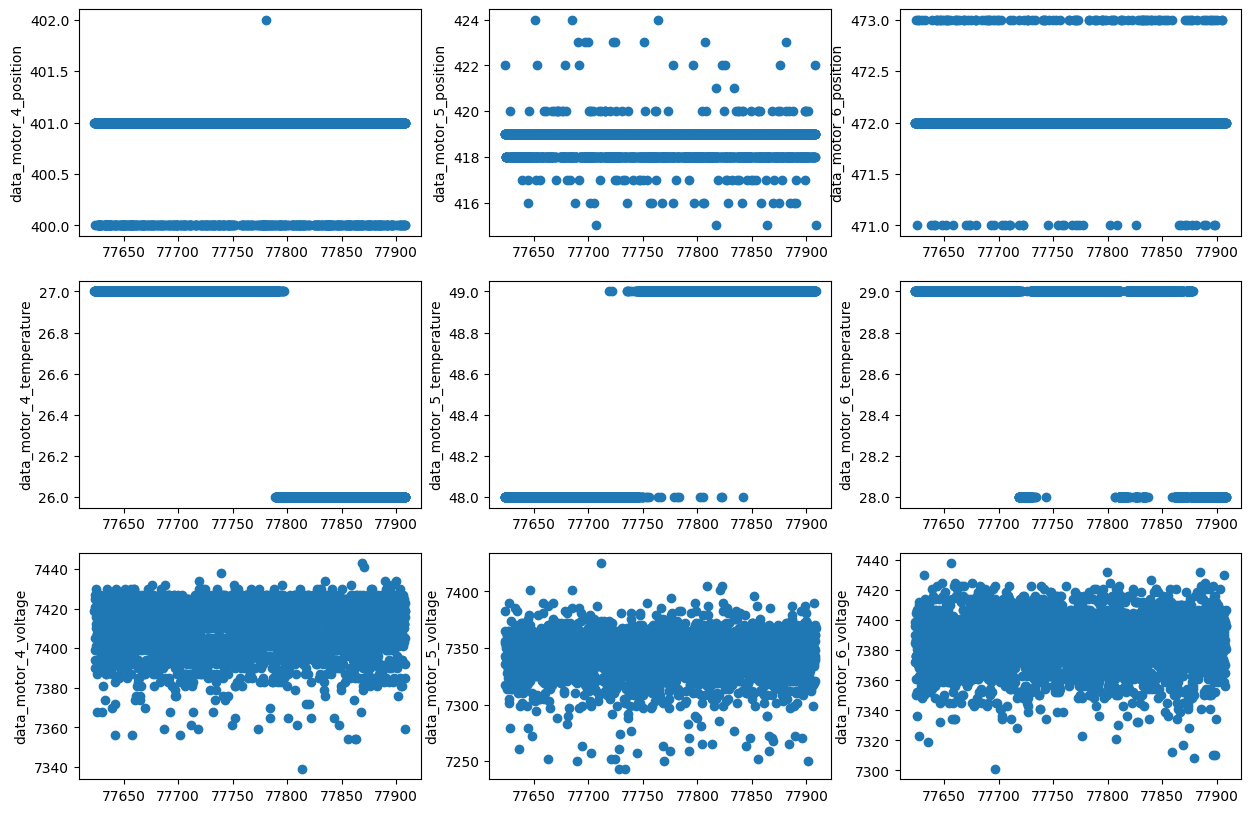

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



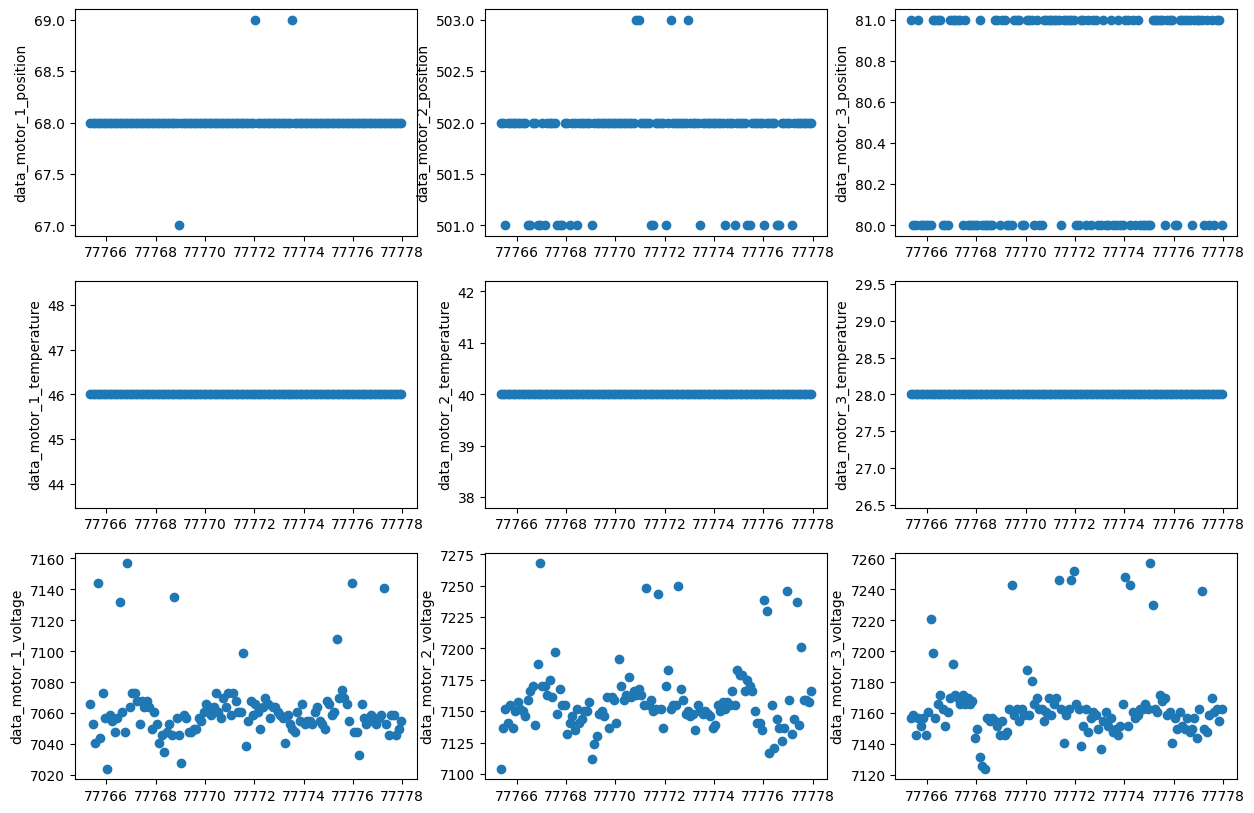

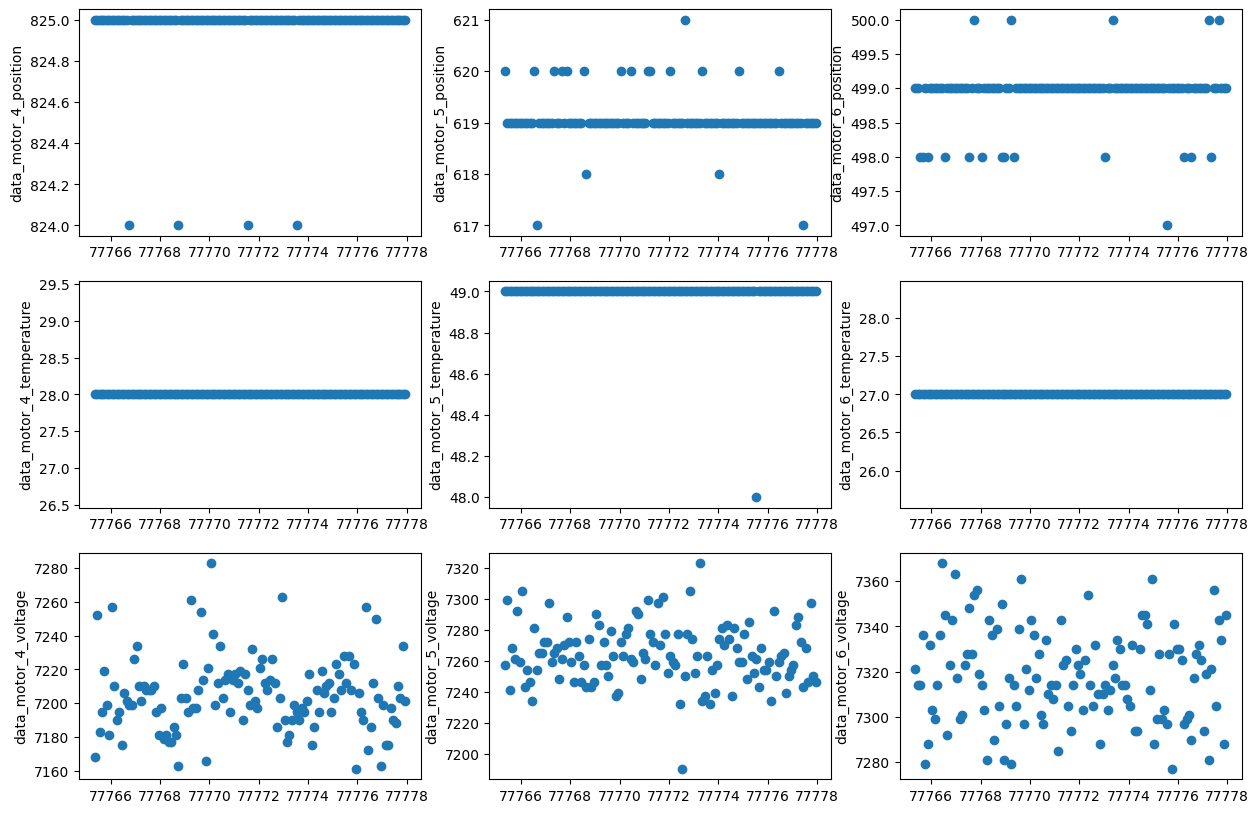

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



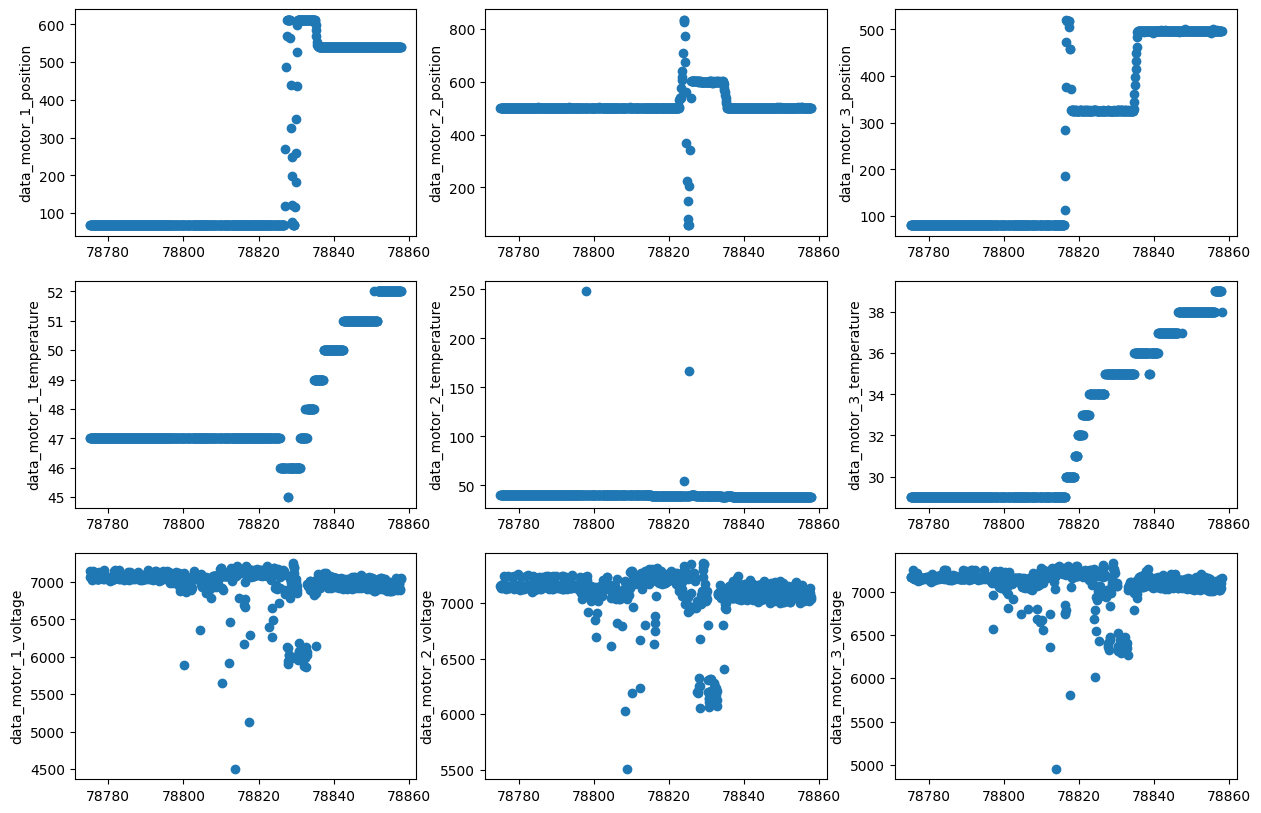

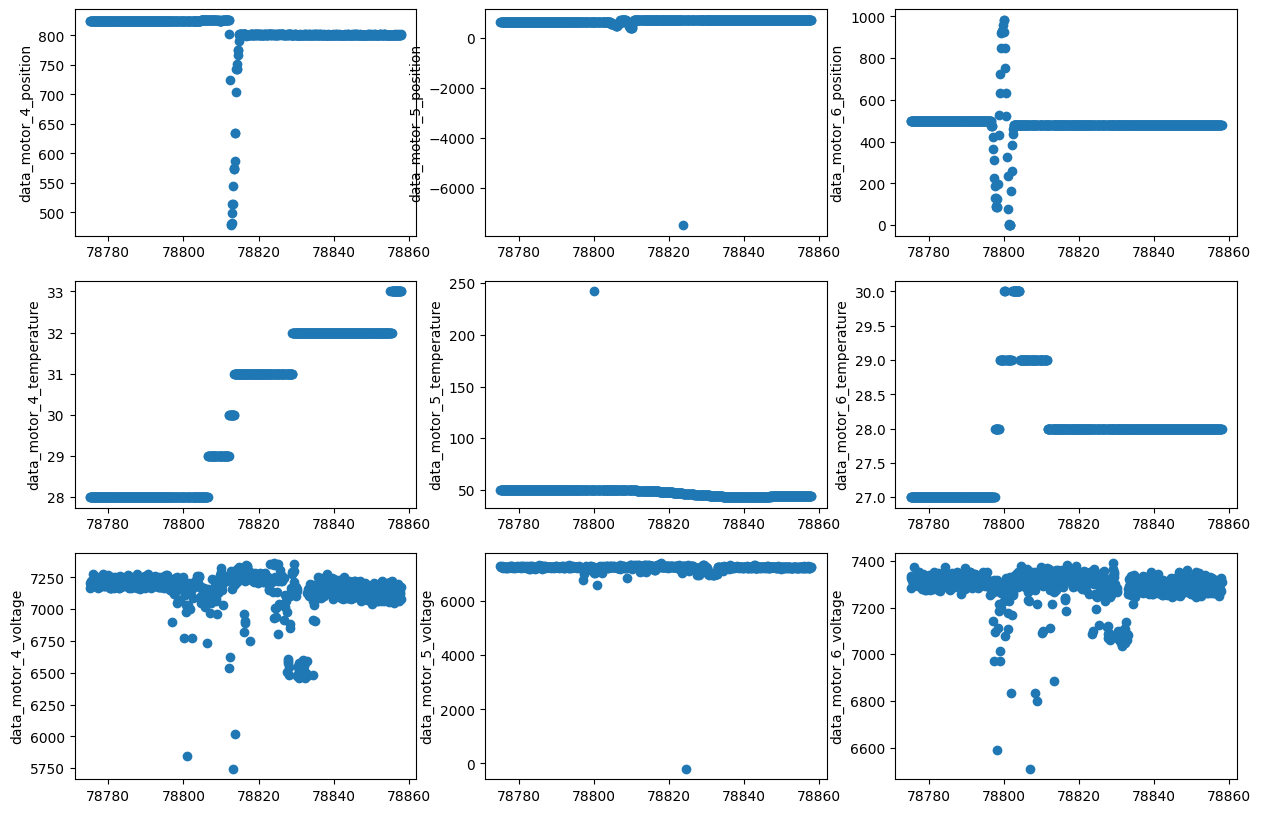

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



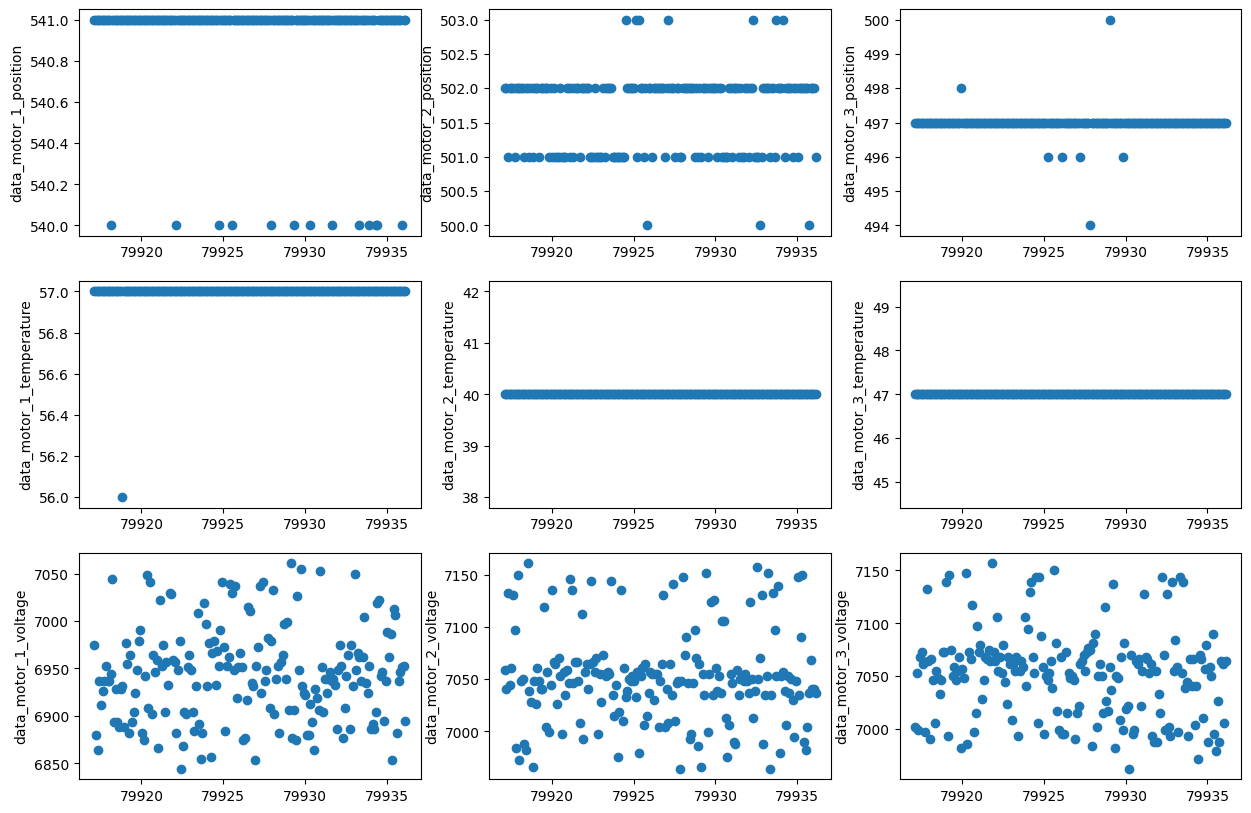

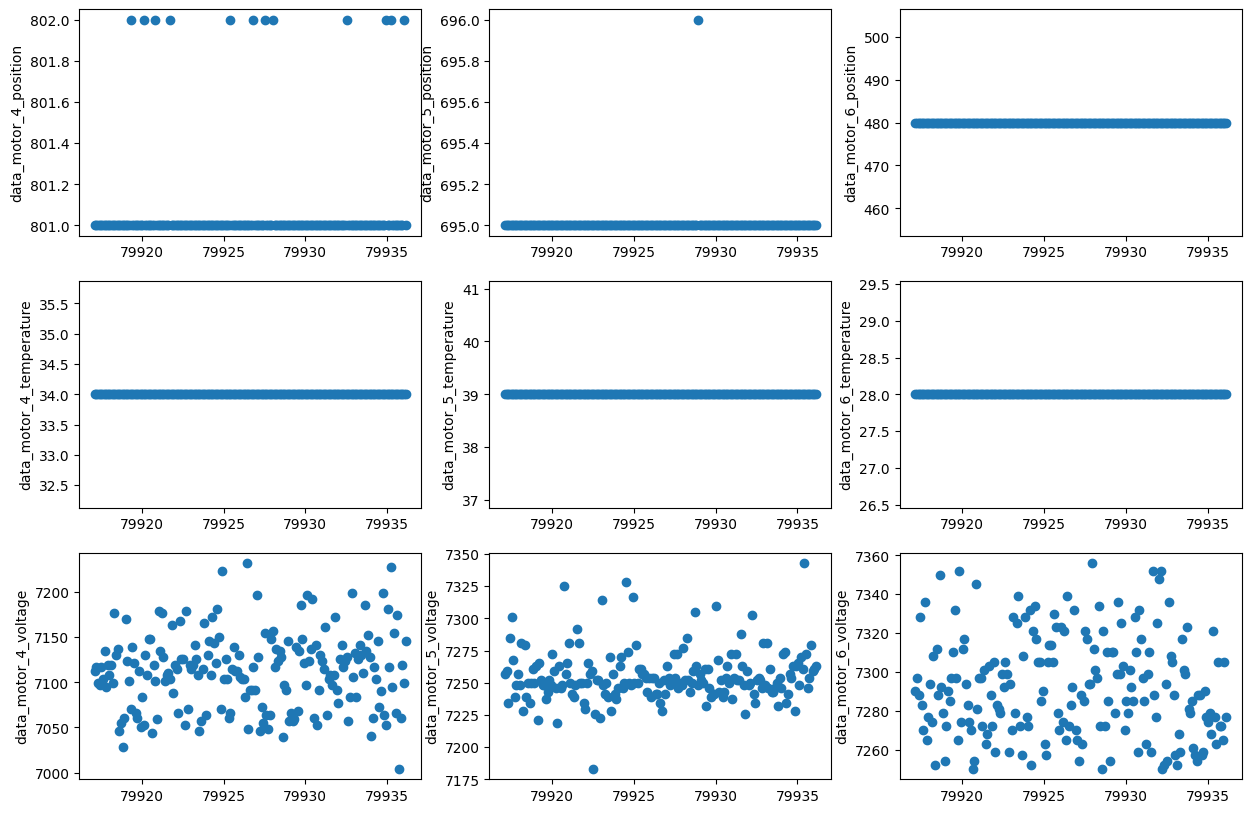

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



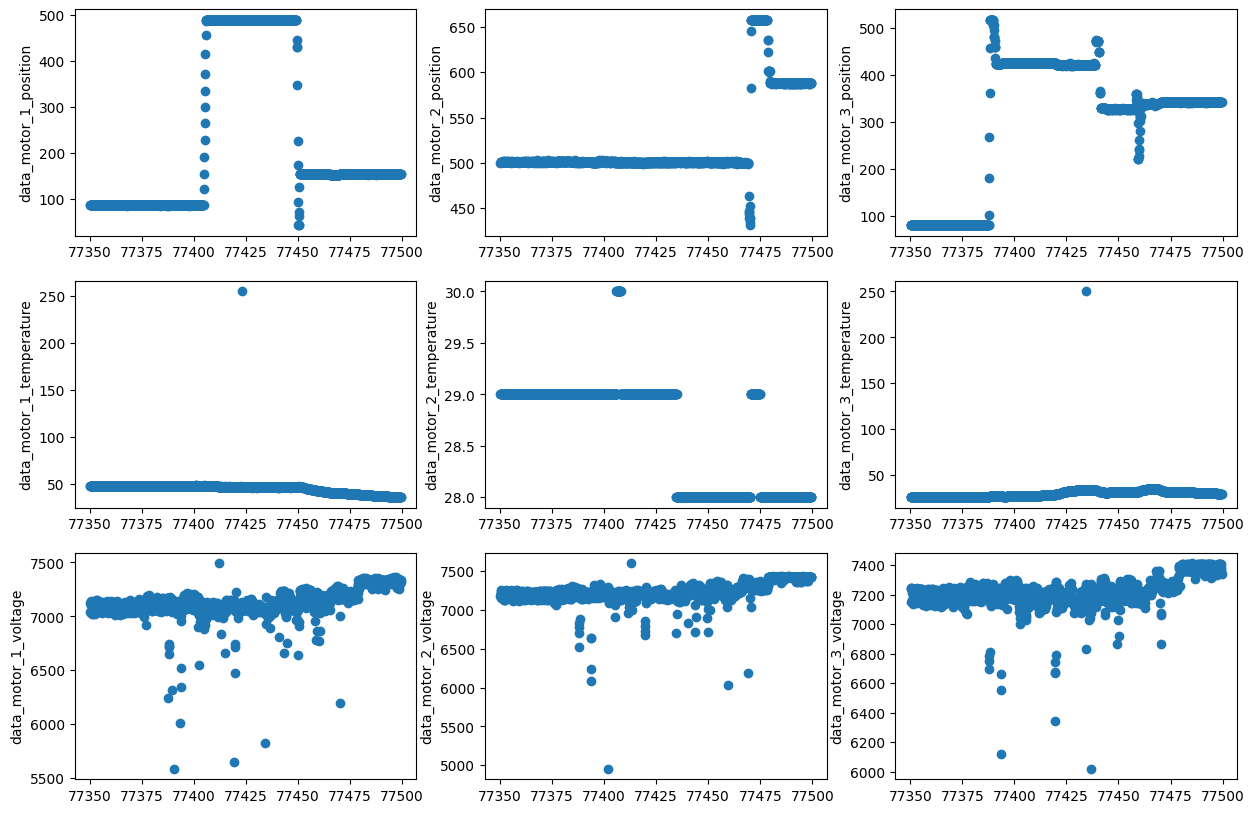

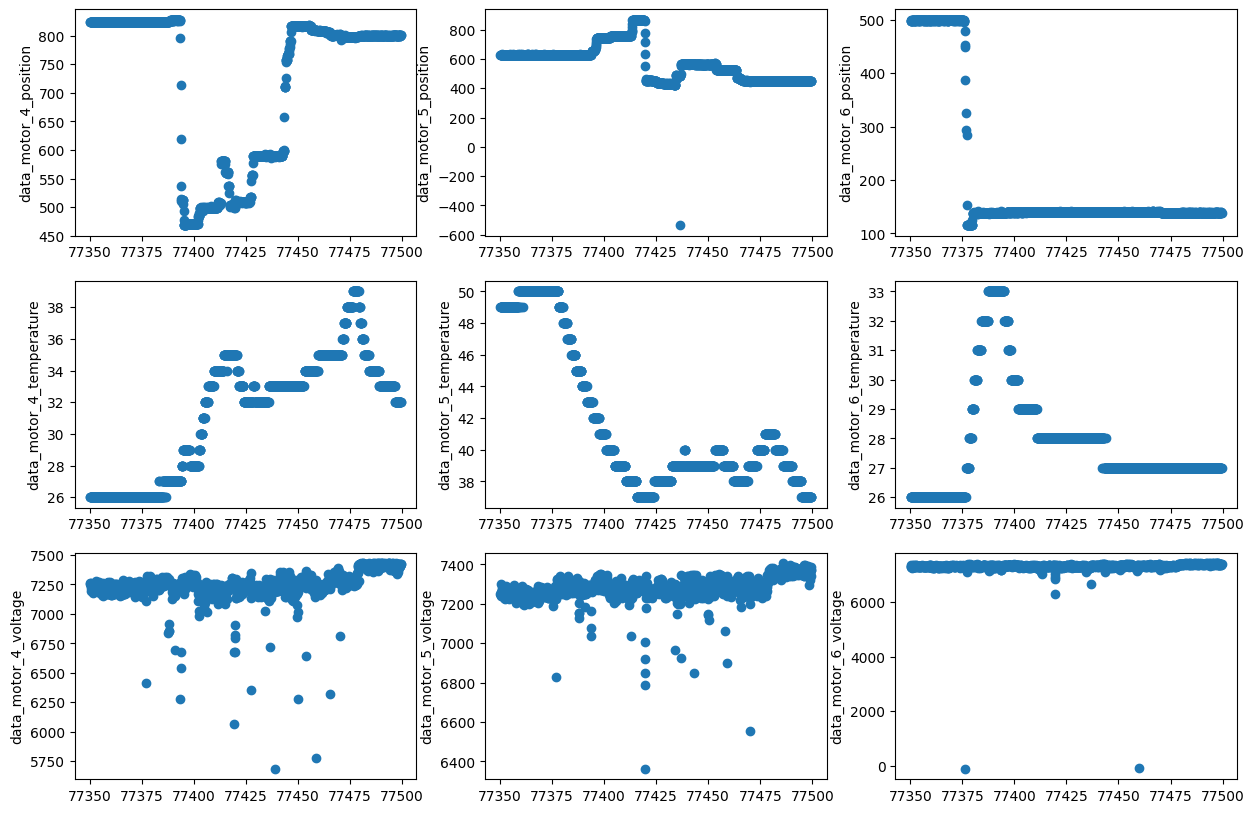

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



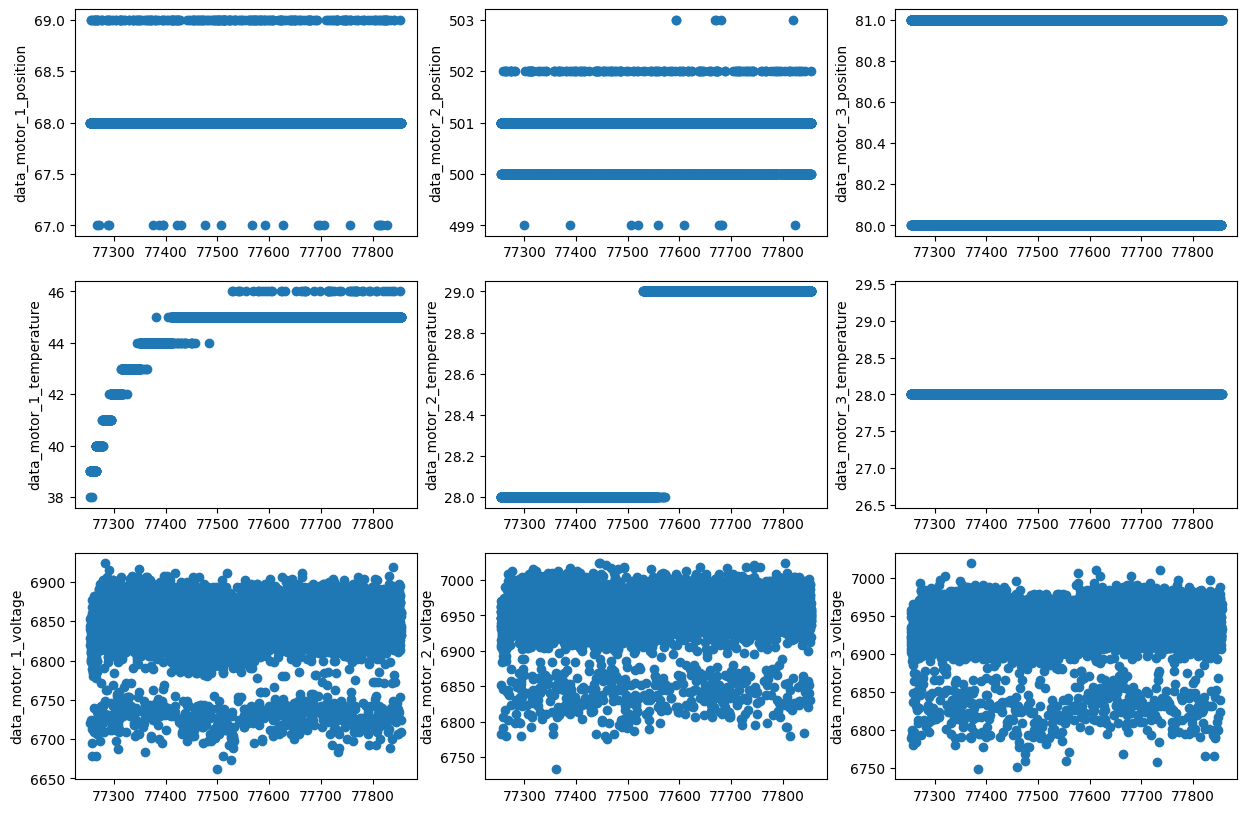

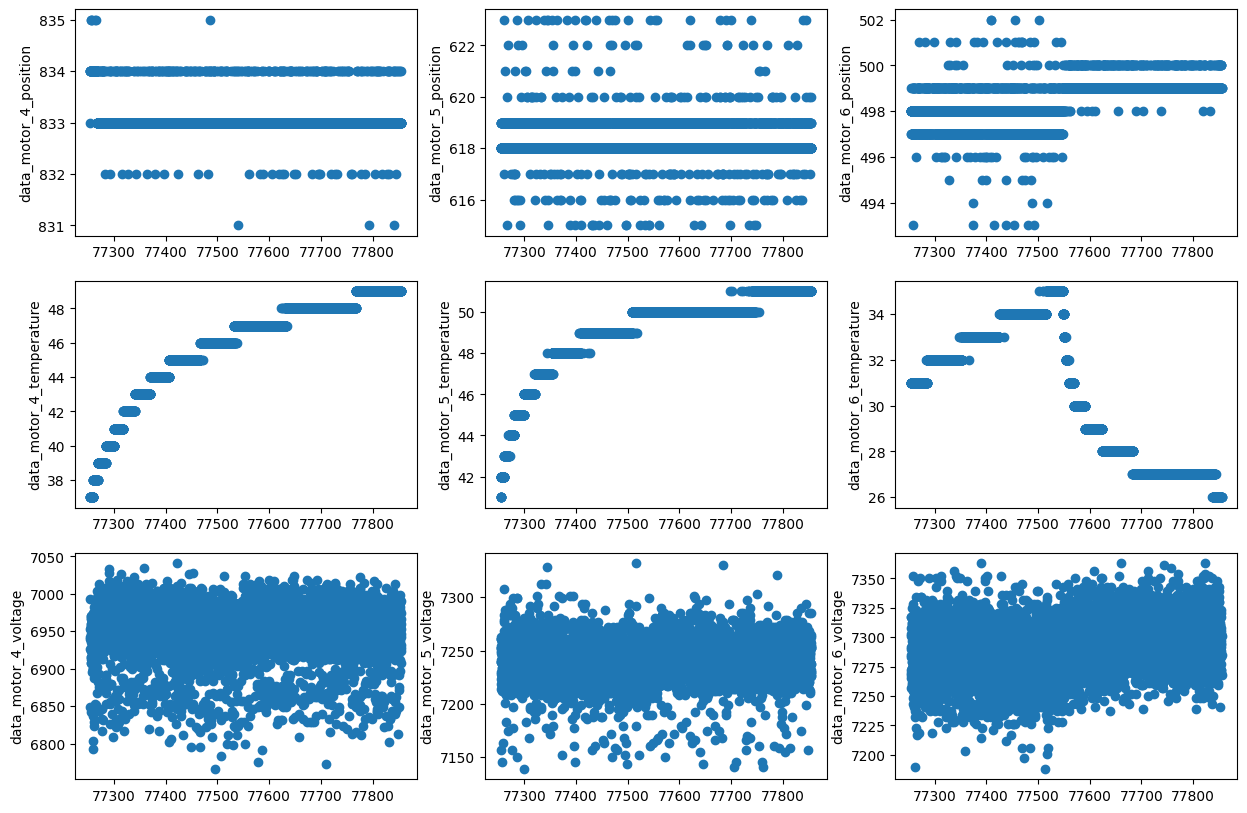

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



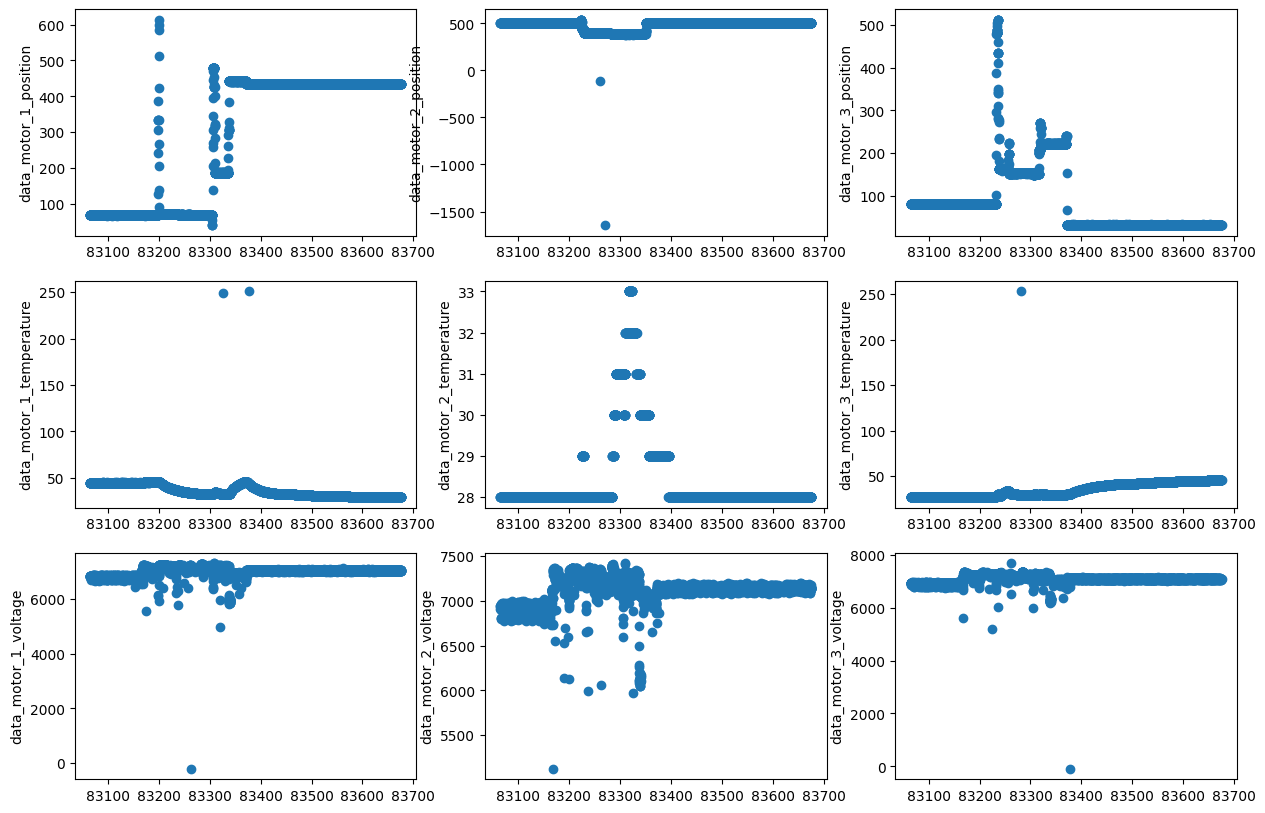

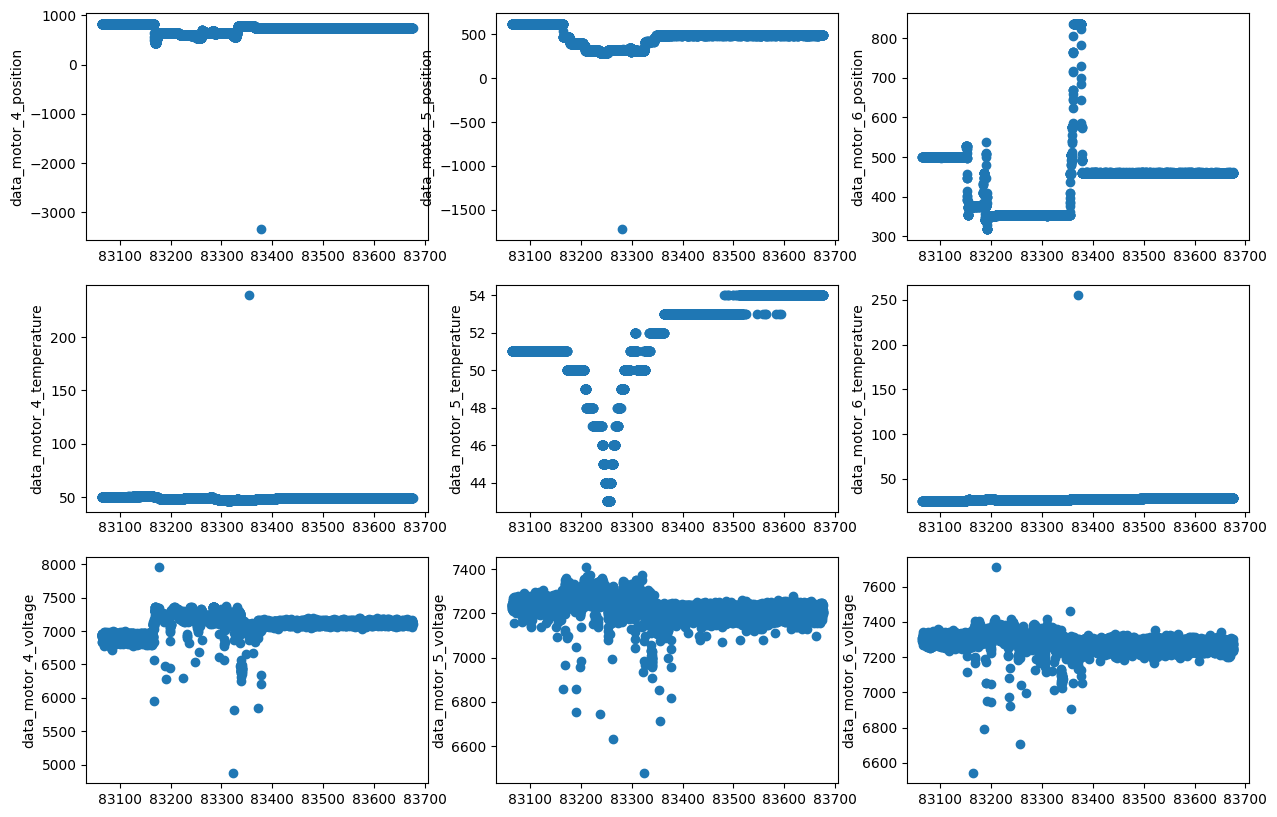

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



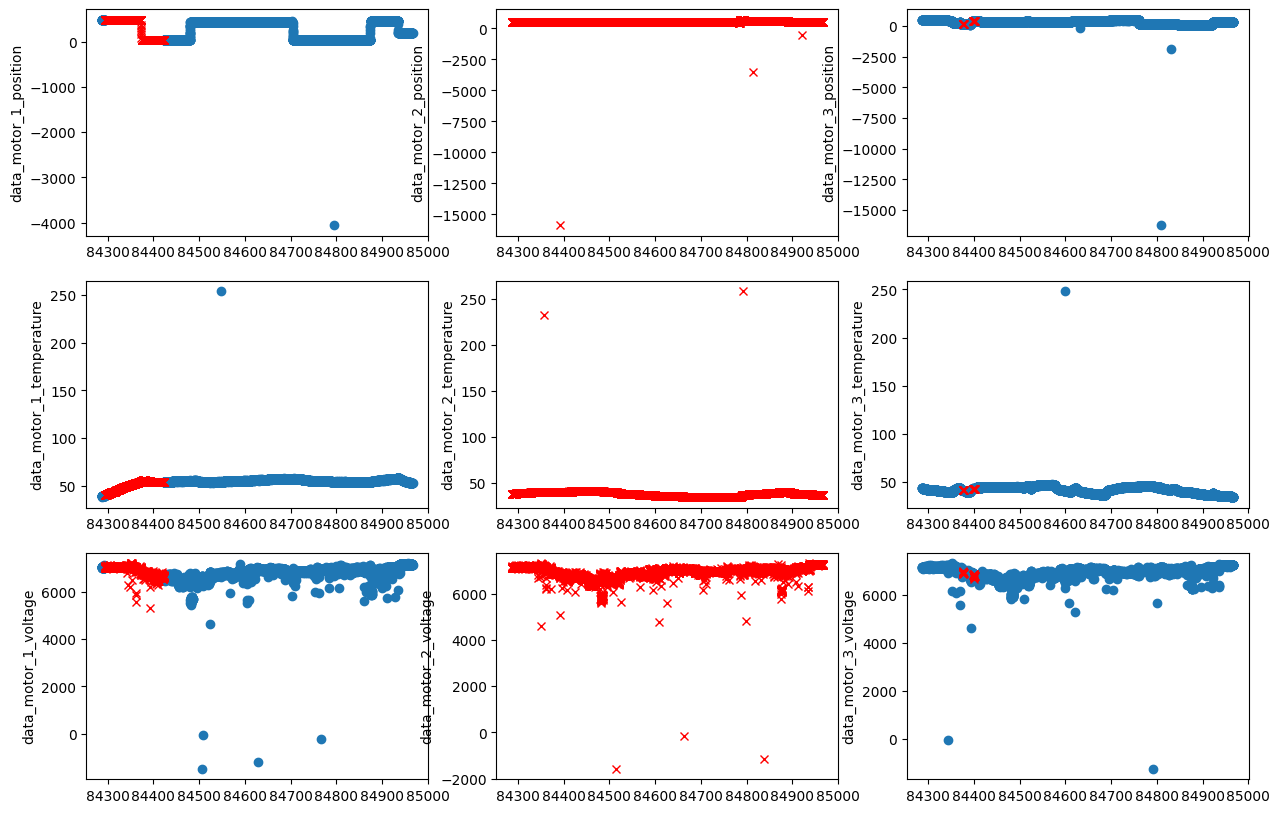

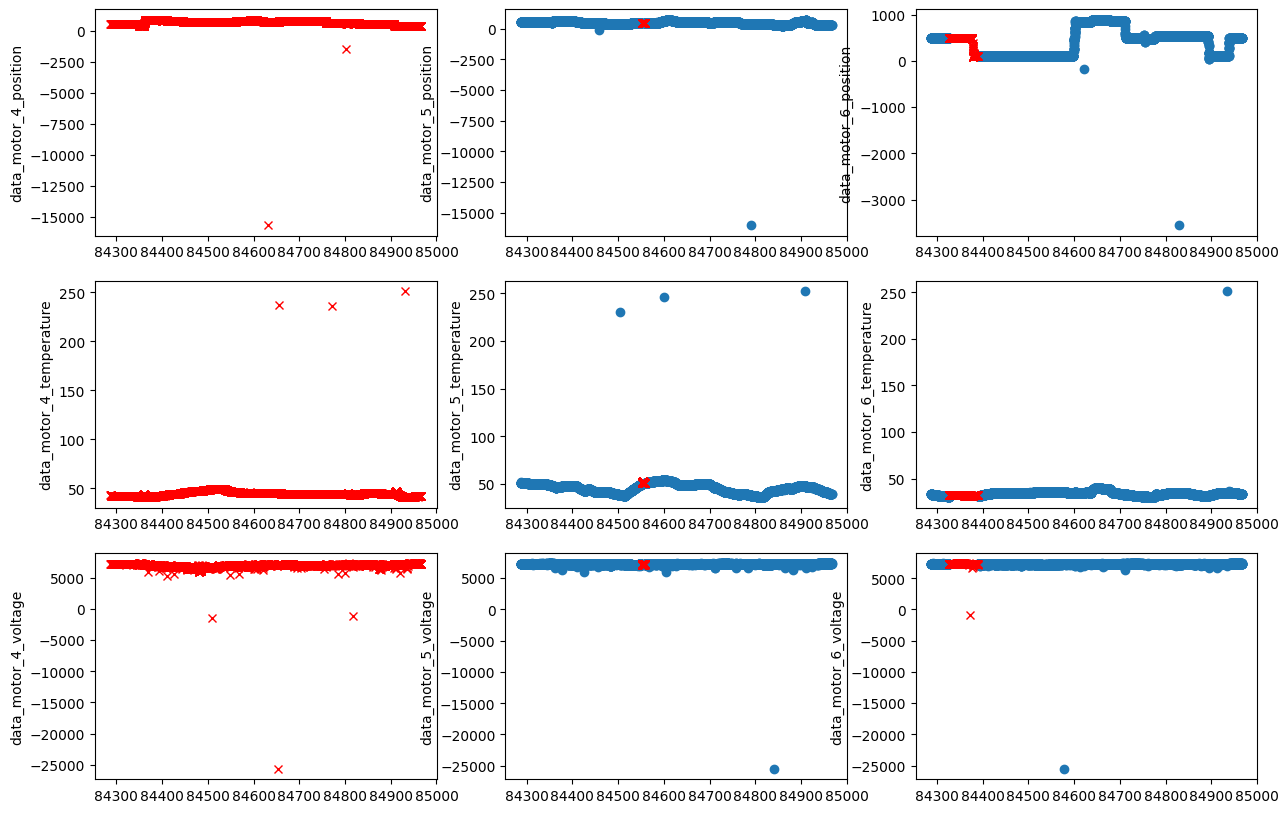

In [10]:
from utility import*
import sys
#
sys.path.insert(0, 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
# Define the path to the folder 'collected_data'
base_dictionary = '../../dataset/training_data/'
# Read all the data
df_data = read_all_test_data_from_path(base_dictionary)

# Extract the features for motor 1: You should replace the features with the ones you have selected in WP1.
features_to_use = [   'data_motor_1_temperature',
                    'data_motor_2_temperature', 
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_temperature', ]
X = df_data[features_to_use]
# Get the label
y = df_data['data_motor_1_label']

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Split the data into training and testing sets using k-fold cross validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    print(train_index,test_index)
    print(len(train_index),len(test_index))
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



[    0     1     2 ... 31130 31131 31133] [    6     7    17 ... 31126 31132 31134]
24908 6227
[    0     1     2 ... 31132 31133 31134] [    3    23    29 ... 31114 31115 31118]
24908 6227
[    1     2     3 ... 31132 31133 31134] [    0     4     5 ... 31119 31125 31128]
24908 6227
[    0     3     4 ... 31132 31133 31134] [    1     2    10 ... 31123 31127 31129]
24908 6227
[    0     1     2 ... 31129 31132 31134] [    9    11    13 ... 31130 31131 31133]
24908 6227


In [12]:
#2 train the model on the training dataset without hyperparameter tuning

from sklearn.model_selection import train_test_split

logistic_model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance of Logistic Regression Model (without hyper-parameter tuning):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Performance of Logistic Regression Model (without hyper-parameter tuning):
Accuracy: 0.9757507628071302
Precision: 0.8390804597701149
Recall: 0.5427509293680297
F1 Score: 0.6591422121896162


c:\Users\idris\OneDrive\Bureau\industrie4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 3. Train a logistic regression model on the entire dataset and evaluate its performance on the same dataset
logistic_model_full = LogisticRegression()
logistic_model_full.fit(X, y)
y_pred_full = logistic_model_full.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
precision_full = precision_score(y, y_pred_full)
recall_full = recall_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full)

print("\nPerformance of Logistic Regression Model (trained on entire dataset):")
print("Accuracy:", accuracy_full)
print("Precision:", precision_full)
print("Recall:", recall_full)
print("F1 Score:", f1_full)


Performance of Logistic Regression Model (trained on entire dataset):
Accuracy: 0.975590171832343
Precision: 0.8392857142857143
Recall: 0.5092879256965944
F1 Score: 0.6339113680154143


c:\Users\idris\OneDrive\Bureau\industrie4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# using cross validation method
from sklearn.model_selection import cross_val_score

# Perform cross-validation with k=5
cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))


c:\Users\idris\OneDrive\Bureau\industrie4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\idris\OneDrive\Bureau\industrie4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Cross-validation scores: [0.38244514 0.1177686  0.00772201 0.00757576 0.08835067]
Mean CV score: 0.12077243502428914
Standard deviation of CV scores: 0.13793236432879635


c:\Users\idris\OneDrive\Bureau\industrie4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Write your discussions here:


# Task 3: Develop classification-based fault detection models

In this task, you are supposed to experiment different classification-based fault detection models to get best F1 score. Please use the 5-fold cross-validation to calculate the best F1 score. You are free to try different models, whether they are discussed in the class or not. To simply your work, you can use the models existed in [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

Please report all the models you tried, how to you tune their hyperparameters, and the corresponding F1 score. Please note that if you would like to tune the hyperparameter, you can use the `GridSearchCv` function in scikit-learn, but you should use it only on the training dataset.

We will try to classify the data for the motor 4 using these features ('data_motor_4_position', 'data_motor_4_temperature') to predict 'data_motor_4_label'

In [15]:
from sklearn.model_selection import GridSearchCV
features_motor_4=['data_motor_4_position', 'data_motor_4_temperature']
X_motor_4=X[features_motor_4]
y=df_data['data_motor_4_label']
X_train, X_test, y_train, y_test = train_test_split(X_motor_4, y, test_size=0.2, random_state=42)
df_data['data_motor_4_label'].value_counts()


data_motor_4_label
0    24483
1     6652
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Support Vector Machine

In [17]:
from sklearn.svm import SVC


svm_model = SVC()

param_grid = {'C': [0.1, 1,10], 'gamma': [0.1, 0.01], 'kernel': ['rbf']}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9988758631764895
Precision: 0.9984836997725549
Recall: 0.9962178517397882
F1 Score: 0.9973494888299886


## Logistic Regression

In [18]:
logistic_model = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_logistic_model = LogisticRegression(**best_params)
best_logistic_model.fit(X_train, y_train)

y_pred = best_logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8095391039023607
Precision: 0.6538461538461539
Recall: 0.21860816944024206
F1 Score: 0.3276643990929705


## K-nearest neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)

y_pred = best_knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9988758631764895
Precision: 0.9977289931869796
Recall: 0.9969742813918305
F1 Score: 0.9973514945138101


## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_tree_model = DecisionTreeClassifier(**best_params)
best_tree_model.fit(X_train, y_train)

y_pred = best_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9995182270756383
Precision: 0.9992429977289932
Recall: 0.9984871406959153
F1 Score: 0.9988649262202043


## Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

kmeans_model = KMeans(n_clusters=2) 
kmeans_model.fit(X_motor_4)
cluster_labels = kmeans_model.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3693099630438557


: 

## Summary of the results

Please add a table in the end, summarying the results from all the models (including the unsupervised learning models). Please write a few texts to explain what is the best model you got, its performance, and how could you further improve it.

| Model   | Accuracy | Precision | Recall | F1   |
|---------|----------|-----------|--------|------|
| Support Vector Machine |   99.89%  |   99.8%   |  99.6% | 99.7%|
| Logistic regression |   81%  |   65.4%   |  21.9% | 32.8%|
| K-nearest neighbors |   99.9%  |   99.8%   |  99.7% | 99.7%|
| Tree Classifier |   99.95%  |   99.9%   |  99.8% | 99.9%|
| Clustering |   XX.X%  |   XX.X%   |  XX.X% | 37%|
